## Marsovci

Razvijamo prototip aplikacije za iskanje vesoljcev na podlagi slik spletnih kamer. Za zdaj zna iz slike izluščiti samo kroge in nobenih drugih likov. Ti krogi se ne sekajo. Primer je na spodnji sliki.

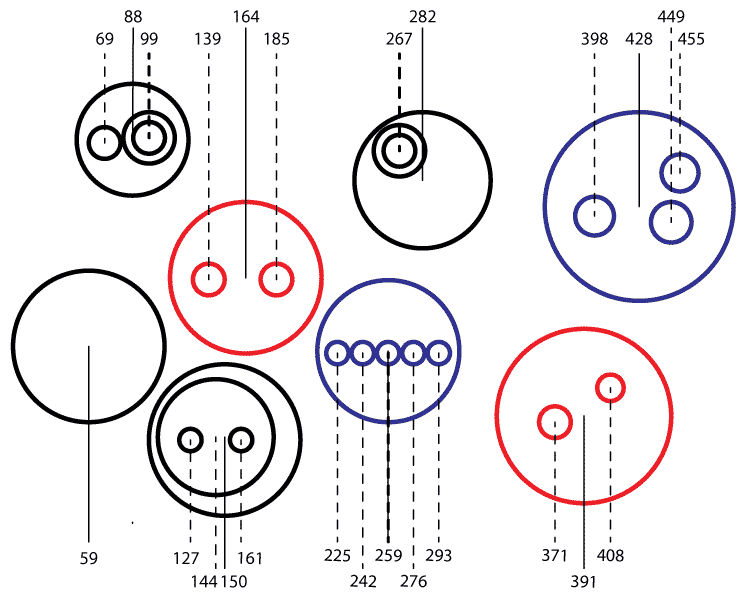

Naša prva naloga je prepoznati ptiče, torej okroglaste živali z dvema očesoma. Ptič je krog, ki

- ni vsebovan v nobenem drugem krogu
- in vsebuje natančno dva kroga,
- ki ne vsebujeta drugih krogov.

Na gornji sliki sta dva ptiča - označena sta z rdečo.

Prepoznati je potrebno tudi letala. To so okroglasti predmeti z okni. Letalo je torej krog, ki

- ni vsebovan v nobenem drugem krogu
- vsebuje nekaj krogov (vendar ne dveh, saj gre v tem primeru za ptiča),
- krogi, ki jih vsebuje, ne vsebujejo drugih krogov.

Z drugimi besedami, letala so kot ptiči, ki imajo kako čudno število oči.

Zaznani krogi so podani s seznamom trojk, ki predstavljajo koordinati središča in polmer. Za gornjo sliko je seznam takšen:

In [1]:
krogi = [
    (164.4, 136.8, 50.8),
    (59.2, 182.8, 50.8),
    (282.8, 71.5, 45.6),
    (391, 229.4, 58.4),
    (259.9, 186, 47.6),
    (428, 89, 63.2),
    (88.6, 44.3, 37.5),
    (371.6, 233.6, 10.6),
    (408.7, 210.5, 8.9),
    (398.1, 95.5, 13),
    (449.5, 99.6, 13.6),
    (455.4, 66.5, 12.4),
    (139.6, 138, 10.6),
    (185, 138, 10.6),
    (69.8, 46.5, 10.6),
    (267.4, 51.7, 17.2),
    (225.8, 187.3, 7.5),
    (242.8, 187.3, 7.5),
    (259.8, 187.3, 7.5),
    (276.7, 187.3, 7.5),
    (293.7, 187.3, 7.5),
    (267.4, 51.7, 10.6),
    (99.6, 43.1, 17.2),
    (99.6, 43.1, 10.6),
    (150.3, 245.5, 50.8),
    (144.3, 243.6, 38.8),
    (127.3, 245.5, 7.5),
    (161.3, 245.5, 7.5)]

### Obvezna naloga

Napiši funkcijo `ptici(krogi)`, ki prejme seznam krogov in vrne množico koordinat središč vseh ptičev. Za gornji primer vrne `{(164.4, 136.8), (391, 229.4)}`

Napiši funkcijo `letala(krogi)`, ki vrne množico koordinat središč letal. V gornjem primeru sta to `{(259.9, 186), (428, 89)}`.

**Pomembno:** test vsake funkcije se mora izteči v 15 sekundah, sicer naloga ni rešena pravilno.

### Dodatna naloga

Napiši funkcijo `sumljivi(krogi)`, ki prejme prav takšen seznam in vrne središča potencialnih marsovskih ladij - to, je, vseh krogov, ki niso vsebovani v nobenem drugem krogu in niso ptiči ali letala.

### Matematična pomoč

Če za dva kroga vemo, da se ne sekata in je prvi večji od drugega, je drugi vsebovan v prvem, kadar je razdalja med središčema manjša od polmera prvega kroga.

$$\sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2} < r_0$$

## Dodatna pomoč (na forumu)

Naloga ni dolga, samo lotiti se je morate tako, kot sem povedal na predavanjih.

Ker gre za nalogo iz uporabe slovarjev in množic in nočem, da bi jo reševali na počasen način, s seznami, imajo testi časovno omejitev: če se bodo testi za posamično funkcijo izvajali več kot 15 sekund, bodo sporočili, da je rešitev napačna.

----------

Malo pomoči.

Najprej poglejmo, kako poiskati ptiče.

Iti bo potrebno čez vse kroge. Se pravi: zanka čez kroge. To znamo napisati.

Znotraj zanke moramo za vsak krog preveriti:

- ali gre za zunanji krog
- ali vsebuje natanko dva kroga
- za vse kroge, ki jih vsebuje (se pravi za tadva kroga) moramo preveriti, da ne vsebujeta drugih krogov.

Če so ti pogoji izpolnjeni, potem ta krog dodamo med ptiče.

Preverjanje teh pogojev je preprosto, če se nanj pripravimo. Konkretno, koristno si je pripraviti dve stvari:

- nekaj, s čimer lahko preverjamo ali je krog zunanji,
- nekaj, s čimer lahko za vsak krog izvemo, katere kroge vsebuje.

Najprej prvo. Ali je krog zunanji, je pravzprav zelo težko izvedeti. Zelo lahko pa je izvedeti, ali je krog notranji: gremo čez vse pare krogov in preverimo, ali prvi morda vsebuje drugega. Če ga, potem je drugi krog eden izmed notranjih krogov. Pripravimo si torej zbirko vseh notranjih krogov; ali je krog zunanji, ugotovimo tako, da preverimo, da ni notranji.

Zdaj pa drugo in tretje: za vsak krog moramo poznati seznam (ali množico ali karkoli že) krogov, ki jih le-ta krog vsebuje. No, to je pa skoraj isto kot to, kar počnemo v prejšnjem odstavku: gremo čez vse pare krogov in če prvi krog vsebuje drugega, dodamo drugi krog v seznam (ali množico ali karkoli že) krogov, ki jih vsebuje prvi krog.

Funkcija `ptici` mora torej najprej pripraviti (ali poklicati funkcijo, ki ji pripravi) tidve stvari, potem pa ju uporabiti za preverjanje pogojev v zanki čez kroge.

Tako opravimo s ptiči. Z letali je podobno. Marsovec pa je krog, ki ni ne notranji ne letalo ne ptič.

Še tole: kako gremo čez vse pare krogov? Gotovo ne s

```
for krog1, krog2 in zip(krogi, krogi[1:]):
    ...
```

To gre čez vse zaporedne pare krogov. In to je zelo uporabno za situacije, ko hočemo čez zaporedne pare. To pa ni ena od teh situacij. Tu hočemo iti prek vseh krogov in za vsakega od njih hočemo iti prek vseh krogov. 

## Stranpoti

Naloga se je izkazala za relativno težko. Tudi zame: dobil sem ogromno mailov študentov. Tole je bilo nekaj tipičnih zapletov.

- Letalo lahko vsebuje tudi samo en krog. To so mnogi spregledali in sem jim moral pomagati. Vendar bi si zlahka pomagali tudi sami, če bi preverili, kateri je tisti krog, na katerega jih opozarjajo testi. Ko bi videli, da se testi pritožujejo, da so spregledali krog, ki vsebuje en sam krog, bi bilo hitro jasno.
- Različni čudni nagooglani izumi. V vsaki generaciji študentov se najde kakšna modna muha, ki se razširi med njimi. Tokrat je nekdo odkril funkcijo `itertools.combinations` in še je kup študentov počelo tole:

   ```
   for krog1, krog2 in itertools.combinations(krogi, 2):
      ...
   ```
   
   To res vrne vse pare krogov, vendar vsakega le enkrat. Če znotraj te zanke preverjamo, ali je `krog1` znotraj `krog2`, bomo spregledali, ali je `krog2` morda znotraj `krog1`.
   
   Čez vse pare gremo preprosto z
   
   ```
   for krog1 in krogi:
      for krog2 in krogi:
   ```
   
   V tem je potretno le to, da bomo med $n^2$ pari naleteli na $n$ parov, ko gre za en in isti krog (`krog1 == krog2`). Ta par bo odpadel sam od sebe, ker ne bo veljalo, da je en krog manjši od drugega.
   
- Površno branje nasvetov. Konkretno: če se dva kroga ne sekata, je drugi znotraj prvega, če je njegovo središče znotraj prvega in je njegov polmer manjši od polmera prvega. Če ne testiramo polmerov, se lahko zgodi kaj zanimivega. Namesto da bo Ljubljana v Sloveniji, bo Slovenija v Ljubljani.

- Slabo poimenovanje spremenljivk. To ni napaka, pač pa pomaga, da naredimo napako, in zavira njeno iskanje. Vsakemu študentu - nekaterim pa še prav posebej - bi privoščil, da dobijo mail od študenta, ki sprašuje zakaj njegov program ne deluje. Program je dolg sto vrstic, v njem pa sta dva ducata spremenljivk z imeni `mnozica`, `mnozica4`, `mnozica5`, `terka`, `terka2`... Dolžino sem si izmislil, imena pa temeljijo na resničnem dogodku. S tem, da so bile terke v resnici seznami. To je prva naloga, v kateri ste res pisali malo daljše programe (čeprav nekoliko brez potrebe) in tu se je prvič dalo zelo dobro izgubiti v imenih spremenljivk.Nekateri študenti so imeli spremenljivke `mama` in `krog`. Pa `glava` in `oci`. To je OK. Je čudno vendar je super. To je to: ko so programirali, so si živo predstavljali, kaj je v teh spremenljivkah in jih ustrezno poimenovali. Mogoče meni ta imena ne pomenijo nič, ker ne vem, kaj je bilo v njihovih glavah, ko so to pisali. To ni OK za skupinsko delo, ampak za njih je pa to natančno to, kar potrebujejo.
   
- Nekateri se ne morejo sprijazniti s tem, da bo potrebno uporabljati slovarje. Da ne bo pomote: zelo mi je všeč, da raziskujete po svoje. Pogosto najdejo študenti odlične rešitve, ki mi sploh niso prišle na misel. Ampak v nekem trenutku, ko vidiš, da ne gre, je mogoče pametno odnehati in narediti tako, kot ti svetujejo. Še enkrat, ne pozivam h komformizmu, delajte po svoje in raziskujte, samo tako se boste kaj naučili. Ampak ... No, če študentu petkrat odgovorim na mail in napišem, da po tej poti res res res ne bo šlo ... potem bi pa že lahko poslušal, ne? :)

    No, bolj nerodno pri tem "raziskovanju" je tole: nekateri študenti ne uporabljajo slovarjev (ali, v splošnem, nečesa drugega, o čemer se učimo), ker "*so bolj navajeni delati s seznami in jih dobro obvladajo*". To je pa zelo narobe. To ni raziskovanje temveč ravno nasprotno.

## Rešitev

Naprej potrebujemo slovar, katerega ključi bodo krogi, vrednosti pa vsi krogi, ki jih ta krog vsebuje. Tega (skoraj) ne moremo narediti drugače, kot da preverimo vse pare krogov. (Hitreje bi šlo samo z bistveno naprednejšimi rečmi.)

Ker smo že pri tem, mimogrede še sestavimo množico krogov, ki so vsebovani v kakem drugem krogu.

Ker bodo ta slovar in to množico potrebovale tri različne funkcije, zložimo njuno sestavljanje v funkcijo.

In [3]:
from collections import defaultdict


def vsebovanost(krogi):
    vsebuje = defaultdict(list)
    notranji = set()

    for krog0 in krogi:
        for krog1 in krogi:
            x0, y0, r0 = krog0
            x1, y1, r1 = krog1
            if r0 > r1 and (x1 - x0) ** 2 + (y1 - y0) ** 2 < r0 ** 2:
                vsebuje[krog0].append(krog1)
                notranji.add(krog1)

    return vsebuje, notranji

Zanki gresta prek terk, ki pa ju ne razpakiram v zanki temveč šele znotraj nje. To pa zato, ker potrebujem tako cele, nerazpakirane kroge (za dodajanje v slovar) kot tudi posamične komponente (za preverjanje vsebovanosti). Če bi razpakiral v zanki, bi moral kasneje zapakirati nazaj. V bistvu je vseeno.

### Ptiči

Funkcija `ptici` pokliče funkcijo `vsebovanost`, da dobi slovar, ki pove kdo `vsebuje` koga in kateri krogi so vsebovani v drugih (notranji). Nato gre čez vse kroge. Zavrne tiste, ki so vsebovani ali pa ne vsebujejo natančno dveh krogov. Nato gre prek seznama krogov, ki so znotraj `krog`-a in preveri, ali kateri od njih (točneje: njiju) vsebuje kak drug krog. Če ga, prekine zanko. Če se zanka ne prekine, dodamo prva dva elementa opisa kroga (torej: koordinati) v množico ptičev.

In [4]:
def ptici(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    pticji = set()
    for krog in krogi:
        if krog in notranji or len(vsebuje[krog]) != 2:
            continue
        for vkrog in vsebuje[krog]:
            if vsebuje[vkrog]:
                break
        else:
            pticji.add(krog[:2])
    return pticji

In [5]:
ptici(krogi)

{(164.4, 136.8), (391, 229.4)}

Bistveno je tole: ker imamo slovar `vsebuje`, zlahka preverimo ali krog vsebuje le dva kroga in ali sta tadva kroga prazna.

Da ne bo koga begalo: prazni seznami so neresnični, neprazni pa resnični. Zato `if vsebuje[vkrog]` v bistvu preveri, ali je seznam krogov, ki jih vsebuje `vkrog` neprazen.

Zanko bi lahko spustili tudi prek ključev slovarja `vsebuje` (`for krog in vsebuje`), da na ta način preverimo le kroge, ki vsebujejo kakšen krog. In, če smo že pri tem, lahko mimogrede poberemo še seznam krogov, ki so vsebovani v tem krogu, `for krog, notranji in vsebuje.items():`. Če rešujemo tako, moramo popaziti na nek zoprn detajl:

In [6]:
def ptici(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    pticji = set()
    for krog, vkrogu in vsebuje.items():
        if krog in notranji or len(vkrogu) != 2:
            continue
        for vkrog in vkrogu:
            if vsebuje[vkrog]:
                break
        else:
            pticji.add(krog[:2])
    return pticji

ptici(krogi)

RuntimeError: dictionary changed size during iteration

Znotraj zanke `for`, ki gre čez slovar, le-tega slovarja ne smemo spreminjati. Da to lahko vodi v težave, vemo že iz zank prek seznamov. Pri slovarjih je reč še hujša, predvsem če le-ti spremenijo dolžino. Zato Python v tem primeru javi napako.

Vendar: saj tega slovarja menda nismo spreminjali!? O, smo. V `if vsebuje[vkrog]`. Če `vkrog` ne vsebuje nobenega kroga, ga ni v `vsebuje`. Ker pa `vsebuje` ni navaden slovar temveč `defaultdict`, ga poizvedovanje po `vsebuje[krog]` doda v slovar (kot vrednost pa mu da prazen seznam). S tem se je `vsebuje` spremenil.

To najpreprosteje rešimo tako, da raje preverjamo, ali `vkrog` nastopa kot ključ v `vsebuje`. Tako ali tako bi bilo to primerneje že v prvi različici rešitve, ki brez potrebe dodaja nove vrednosti v slovar.

In [7]:
def ptici(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    pticji = set()
    for krog, vkrogu in vsebuje.items():
        if krog in notranji or len(vkrogu) != 2:
            continue
        for vkrog in vkrogu:
            if vkrog in vsebuje:
                break
        else:
            pticji.add(krog[:2])
    return pticji

ptici(krogi)

{(164.4, 136.8), (391, 229.4)}

Zdaj pa uporabimo še dejstvo, da `notranji` vedno vsebuje dva elementa, torej v bistvu ne potrebujemo notranje zanke in komplikacij z `break` in `else`.

In [8]:
def ptici(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    pticji = set()
    for krog, vkrogu in vsebuje.items():
        if (krog not in notranji
                and len(vkrogu) == 2 \
                and vkrogu[0] not in vsebuje and vkrogu[1] not in vsebuje):
            pticji.add(krog[:2])
    return pticji

ptici(krogi)

{(164.4, 136.8), (391, 229.4)}

Tako, kot je funkcija napisana tu, so tri vrstice, v katere smo prelomili pogoj, natančno alineje iz besedila naloga:

- gre za zunanji krog (`krog not in notranji`)
- ali vsebuje natanko dva kroga (`len(vkrogu) == 2`)
- za vse kroge, ki jih vsebuje (se pravi za tadva kroga) moramo preveriti, da ne vsebujeta drugih krogov (`vkrogu[0] not in vsebuje and vkrogu[1] not in vsebuje`).

### Letala

Rešitev letal je podobna rešitvi ptičev, le da se ne moremo znebiti notranje zanke, saj ni nujno, da sta znotraj kroga ravno dva kroga.

In [9]:
def letala(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    letala = set()
    for krog, vkrogu in vsebuje.items():
        if krog in notranji or len(vkrogu) == 2:
            continue
        for vkrog in vkrogu:
            if vkrog in vsebuje:
                break
        else:
            letala.add(krog[:2])
    return letala

### Sumljivi

Pri iskanju sumljivih moramo zunanjo zanko spustiti prek `krogi`, saj je potrebno preveriti tudi kroge, ki ne vsebujejo nobenega kroga. V zanki najprej odmislimo ne-zunanje kroga. Nato dodamo vse kroge, ki ne vsebujejo nobenega kroga. Če krog vsebuje kakšen krog, pa je lahko ptič (če vsebuje dva kroga) ali letalo (če vsebuje kako drugo število krogov) ... razen, če kateri od teh krogov vsebuje še kakšen krog. Zato torej naredimo zanko prek vseh vsebovanih krogo in če kateri vsebuje kak krog, gre za marsovca, zanka pa prekinemo.

In [10]:
def sumljivi(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    nlp = set()
    for krog in krogi:
        if krog in notranji:
            continue
        if krog not in vsebuje:
            nlp.add(krog[:2])
        else:
            for vkrog in vsebuje[krog]:
                if vkrog in vsebuje:
                    nlp.add(krog[:2])
                    break
    return nlp

### Vse skupaj

Celotna rešitev vse delov naloge je torej takšna:

In [11]:
from collections import defaultdict


def vsebovanost(krogi):
    vsebuje = defaultdict(list)
    notranji = set()

    for krog0 in krogi:
        for krog1 in krogi:
            x0, y0, r0 = krog0
            x1, y1, r1 = krog1
            if r0 > r1 and (x1 - x0) ** 2 + (y1 - y0) ** 2 < r0 ** 2:
                vsebuje[krog0].append(krog1)
                notranji.add(krog1)

    return vsebuje, notranji


def ptici(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    pticji = set()
    for krog, vkrogu in vsebuje.items():
        if (krog not in notranji
                and len(vkrogu) == 2 \
                and vkrogu[0] not in vsebuje and vkrogu[1] not in vsebuje):
            pticji.add(krog[:2])
    return pticji


def letala(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    letala = set()
    for krog, vkrogu in vsebuje.items():
        if krog in notranji or len(vkrogu) == 2:
            continue
        for vkrog in vkrogu:
            if vkrog in vsebuje:
                break
        else:
            letala.add(krog[:2])
    return letala


def sumljivi(krogi):
    vsebuje, notranji = vsebovanost(krogi)
    nlp = set()
    for krog in krogi:
        if krog in notranji:
            continue
        if krog not in vsebuje:
            nlp.add(krog[:2])
        else:
            for vkrog in vsebuje[krog]:
                if vkrog in vsebuje:
                    nlp.add(krog[:2])
                    break
    return nlp